<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a  href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверьте-гипотезы" data-toc-modified-id="Проверьте-гипотезы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверьте гипотезы</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a 

### Описание проекта
* Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы (например,
Xboxили PlayStation). Вам нужно выявить определяющие успешность игры
закономерности. Это позволит сделать ставку на потенциально популярный продукт и
спланировать рекламные кампании.
* Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й
— по данным 2026 года.
* В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board)
— это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB
оценивает игровой контент и присваивает ему подходящую возрастную категорию,
например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы долларов)

EU_sales — продажи в Европе (миллионы долларов)

JP_sales — продажи в Японии (миллионы долларов)

Other_sales — продажи в других странах (миллионы долларов)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмотрим общую информацию о датафрейме.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропущенных значений много в столбцах "Critic_Score ", "User_Score", "Rating". Так же есть немного пропущенных значений в столбце "Year_of_Release".

critic_score - оценка критиков - вполне возможно, что игры не оценивались критиками.

rating - рейтинг от ESRB - может быть ранее не было такой организации.

user_score - вероятно, не оставили оценку.

Предлагаю пропуски в этих столбцах оставить как есть, чтобы иметь возможность максимально правдоподобно оценить оценку критиков, рейтинг и сервис по оценке. Где они есть

Year_of_Release - год выпуска. По среднему и по медиане заполнять не очень правильно. Предлагаю пропуски в этих столбцах оставить как есть

В столбце "user_score" численный показатель, а имеет тип object - меняем на float.

### Предобработка данных¶

Заменем название столбцов(приведем к нижнему регистру).


In [5]:
games.columns = games.columns.str.lower()

Изменение типа данных по столбцу "user_score".

In [6]:
#Смотрим на уникальные значения столбца
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пропусков, есть "tbd". Посмотрим, сколько их:

In [7]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


При разборе значений 'tbd', Что значит Tbd в рейтинге? Интернет выдает что: TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Поэтому предлагаю заменить 'tbd' на NaN.

In [8]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

И посмотрим сколько их станет.

In [9]:
print('Количество NaN в столбце user_score:', games['user_score'].isnull().sum())

Количество NaN в столбце user_score: 9125


Приведем значение столбца 'user_score' к числовому:

In [10]:
games['user_score'] = games['user_score'].astype('float')

Посчитаем суммарные продажи во всех регионах и запишем их в столбец 'sales'

In [11]:
games['sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

<div class="alert alert-info">

**Артём:** ✍️ Можно так:
        
```py
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
```

</div>

In [12]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в каждый из представленных в наших данных годов:

In [13]:
games['year_of_release'].sort_values()

1764     1980.0
546      1980.0
1968     1980.0
6300     1980.0
6875     1980.0
          ...  
16373       NaN
16405       NaN
16448       NaN
16458       NaN
16522       NaN
Name: year_of_release, Length: 16715, dtype: float64

In [14]:
#Преобразуем значение в столбеце 'year_of_release' в 'int'
games['year_of_release'] = games['year_of_release'].fillna(0)
games['year_of_release'] = games['year_of_release'].astype('int')



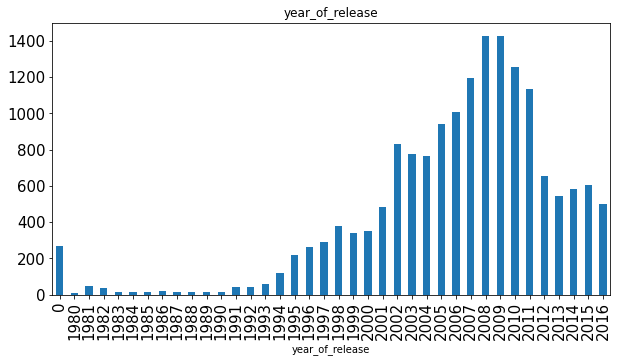

In [15]:
games_year_of_release = games.groupby('year_of_release').count()['name']
games_year_of_release.plot(x='year_of_release', y='name', kind='bar',figsize=(10,5), title='year_of_release', legend=None, fontsize=15);   


До 1993 года игр практически не было. Потом они начали появляться. Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик - 2008-2009 года. После 2011 года начался резкий спад. 

 Посмотрите, как менялись продажи по платформам. Выберите платформы с
наибольшими суммарными продажами и постройте распределение по годам. За
какой характерный срок появляются новые и исчезают старые платформы?

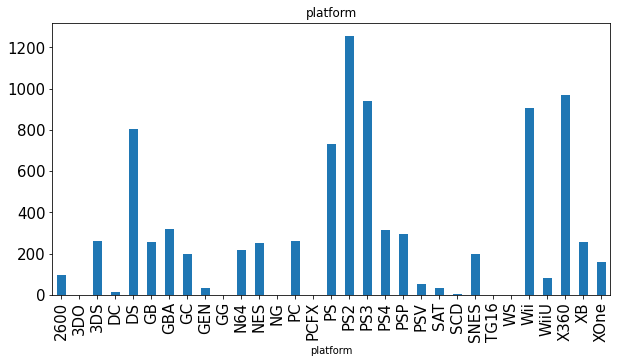

In [16]:
games_platform = games.groupby('platform').sum()['sales']
games_platform.plot(x='platform', y='sales', kind='bar',figsize=(10,5), title='platform', legend=None, fontsize=15 );

Судя по графику выберем топовые платформы, это получается: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'

In [17]:
top_platform = ['PS2','X360', 'PS3', 'Wii', 'DS', 'PS']

Построим распределение по годам top_platform

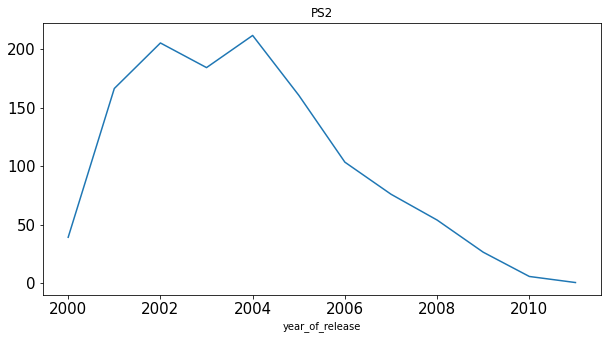

In [18]:
#Распределение PS2
games1 = games.query('year_of_release >= 1980')
df_games_top_platform = games1[(games1['platform'] == 'PS2')].groupby('year_of_release')['sales'].sum()
df_games_top_platform.plot(x='year_of_release', y='sales', kind='line',figsize=(10,5), title='PS2', legend=None, 
                            fontsize=15, by='platform');

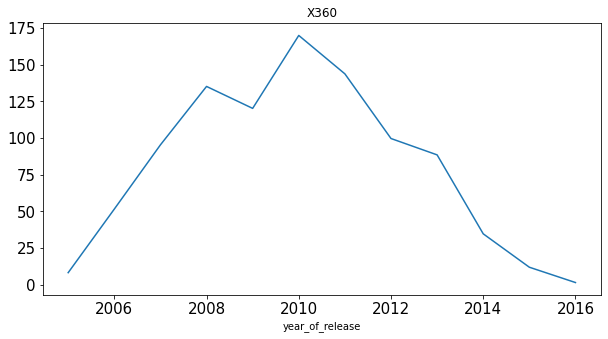

In [19]:
#Распределение X360
df_games_top_platform = games1[(games1['platform'] == 'X360')].groupby('year_of_release')['sales'].sum()
df_games_top_platform.plot(x='year_of_release', y='sales', kind='line',figsize=(10,5), title='X360', legend=None, 
                            fontsize=15, by='platform'); 

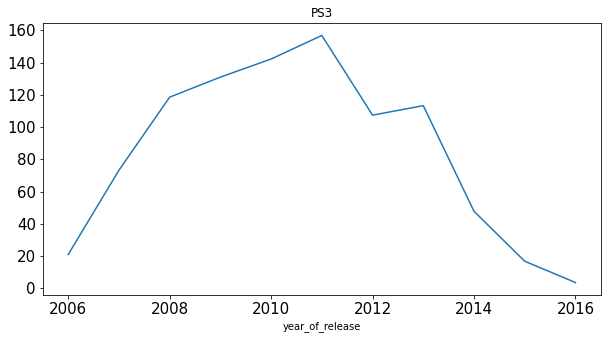

In [20]:
#Распределение PS3

df_games_top_platform = games1[(games1['platform'] == 'PS3')].groupby('year_of_release')['sales'].sum()
df_games_top_platform.plot(x='year_of_release', y='sales', kind='line',figsize=(10,5), title='PS3', legend=None, 
                            fontsize=15, by='platform'); 

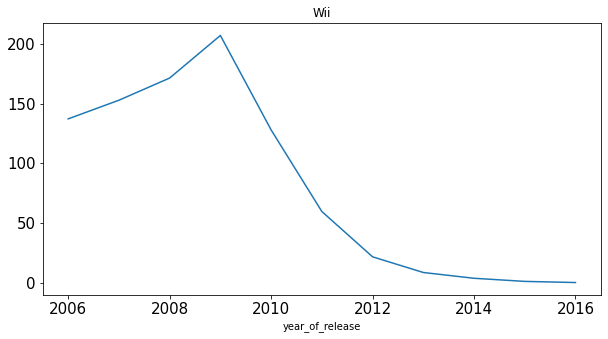

In [21]:
#Распределение Wii
df_games_top_platform = games1[(games1['platform'] == 'Wii')].groupby('year_of_release')['sales'].sum()
df_games_top_platform.plot(x='year_of_release', y='sales', kind='line',figsize=(10,5), title='Wii', legend=None, 
                            fontsize=15, by='platform');

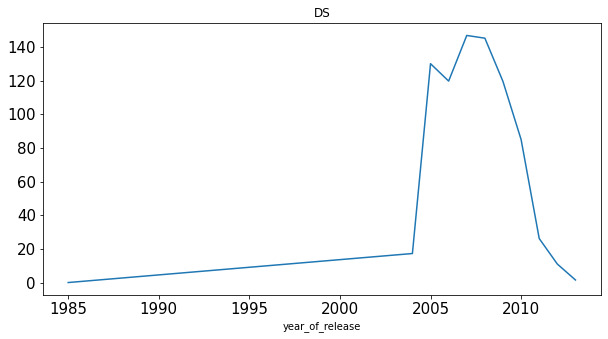

In [22]:
#Распределение DS
df_games_top_platform = games1[(games1['platform'] == 'DS')].groupby('year_of_release')['sales'].sum()
df_games_top_platform.plot(x='year_of_release', y='sales', kind='line',figsize=(10,5), title='DS', legend=None, 
                            fontsize=15, by='platform');

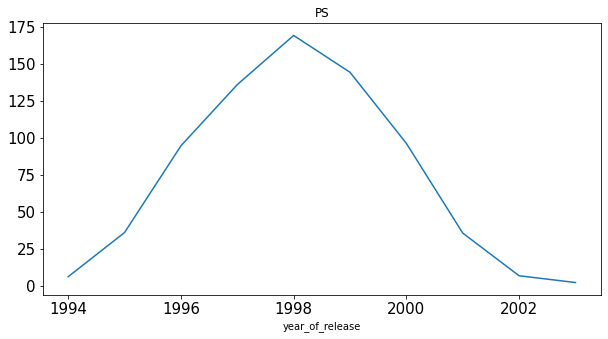

In [23]:
#Распределение X360
df_games_top_platform = games1[(games1['platform'] == 'PS')].groupby('year_of_release')['sales'].sum()
df_games_top_platform.plot(x='year_of_release', y='sales', kind='line',figsize=(10,5), title='PS', legend=None, 
                            fontsize=15, by='platform');

PS - была с 1994 года до 2003, почти 10 лет;

PS2 - с 2000 до 2011 года - 11 лет;

PS3 - с 2006 по 2016год - 10 лет;

DS - вышла в 1985, потом вообще нет данных. И с 2004 года популярность стала расти, пик в 2008, конец срока службы - 2013 год - 8 лет;

Wii - с 2006 по 2016год - 10 лет.

X360 - с 2005 по 2016год - 11 лет.

Таким образом, в среднем платформа живет 10 лет. И жила бы больше, если б не выходили более новые платформы. Но это неизбежно, т.к. прогресс идет вперед и выходят новые игры с другими техническими характеристиками.
Выберем актуальный период - период, за который мы будем оценивать наши данные, на основании выводов по которым будем строить предсказательные модели на 2017 год.

На мой взгляд, актуальным периодом является период с 2002 по 2016 год: В 2002 это год, резкий скачок по количеству игр, выпущенных в год в этом периоде представлены данные по абсолютно всем самым популярным платформам.

Предыдущие года отбросим.

Построим ещё один график, отображающий динамику продаж по уже актуальным годам и ответим на вопрос: Какие платформы лидируют по продажам, растут или падают?

In [24]:
#Выделим сегмент платформ начиная с 2013 года
games_2017 = games.query('year_of_release >= 2013')
games_2017.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


<div class="alert alert-info">

**Артём:** ✍️ Копию датафрейма лучше сделать так, чтобы не изменить первоначальный датафрейм. Для этого в конце пишем `.copy()`:

```py
df_2 = df.loc[df['column'] >= value].copy()
```

</div>

In [25]:
platform = games_2017['platform'].unique().tolist()
platform

['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV', 'DS', 'PSP']

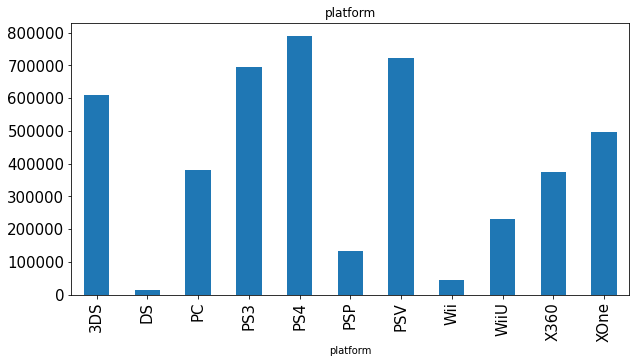

In [26]:
games_2017_platform = games_2017.groupby('platform').sum()['year_of_release']
games_2017_platform.plot(x='platform', y='sales', kind='bar',figsize=(10,5), title='platform', legend=None, fontsize=15 );

In [27]:
games_2017_2 = games_2017[(games_2017['platform']== '3DS')]\
                .groupby('year_of_release')['sales'].sum()

games_2017_3 = games_2017[(games_2017['platform']== 'DS')]\
                .groupby('year_of_release')['sales'].sum()

games_2017_4= games_2017[(games_2017['platform']== 'X360')]\
                .groupby('year_of_release')['sales'].sum()

games_2017_5= games_2017[(games_2017['platform']== 'PS3')]\
                .groupby('year_of_release')['sales'].sum()

games_2017_6= games_2017[(games_2017['platform']== 'PS4')]\
                .groupby('year_of_release')['sales'].sum()

games_2017_7= games_2017[(games_2017['platform']== 'PC')]\
                .groupby('year_of_release')['sales'].sum()

games_2017_8= games_2017[(games_2017['platform']== 'PSP')]\
                .groupby('year_of_release')['sales'].sum()

games_2017_9= games_2017[(games_2017['platform']== 'XOne')]\
                .groupby('year_of_release')['sales'].sum()

games_2017_10= games_2017[(games_2017['platform']== 'WiiU')]\
                .groupby('year_of_release')['sales'].sum()

games_2017_1= games_2017[(games_2017['platform']== 'Wii')]\
                .groupby('year_of_release')['sales'].sum()

games_2017_11= games_2017[(games_2017['platform']== 'PSV')]\
                .groupby('year_of_release')['sales'].sum()

In [28]:
df=pd.DataFrame({'Wii':games_2017_1,'3DS':games_2017_2, 'DS':games_2017_3,
                 'X360':games_2017_4,'PS3':games_2017_5,
                 'PS4':games_2017_6, 'PC': games_2017_7, 'PSP':games_2017_8,
                 'XOne': games_2017_9,'WiiU':games_2017_10,
                 'PSV': games_2017_11});

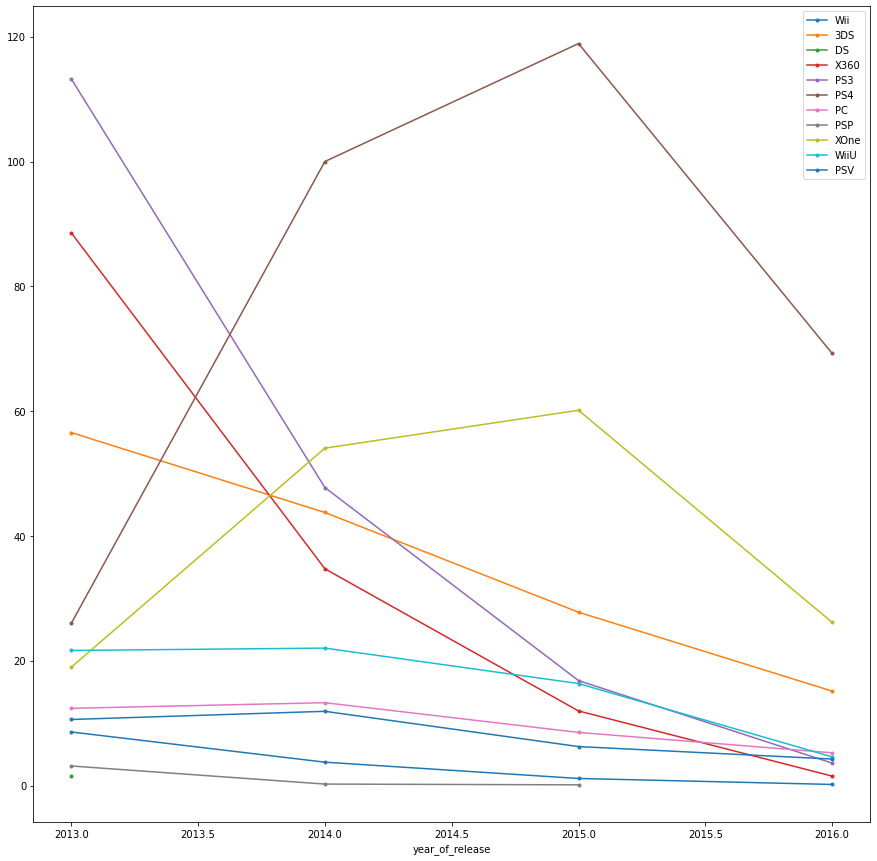

In [29]:
df.plot(style='.-', figsize=(15,15));

На конец 2016 года лидируют по продажам следующие платформы:

PS4

Xone

3DS

Это топ-3. Причем, исходя из данных, количество продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сказать, что весь рынок игр падает.
Boxplot по глобальным продажам игр

Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Оценим разницу в продажах и в средних продажах на разных платформах. Опишем результат.

Если смотреть период с 2013 года, то так же остается топ-3 PS4, Xone, 3DS. Но так же платформы PS3, WiiU, Wii, PC находятся на не плохом уровне продаж

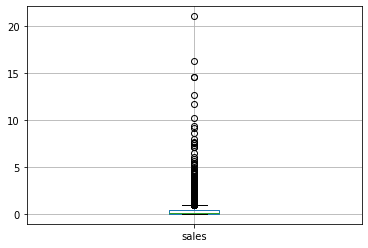

In [30]:
games_2017.boxplot(column='sales');

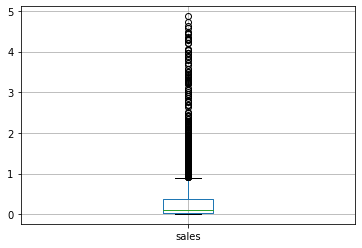

In [31]:
games_2017.query('sales <= 5').boxplot(column = 'sales');

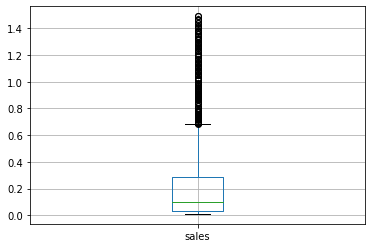

In [32]:
games_2017.query('sales <= 1.5').boxplot(column = 'sales');

В среднем, продажи игр составляют до 0,7 млн долларов. Медиана - 0,15 миллиона долларов.

Построим ящик с усами по наиболее популярным на конец 2016 года платформам.

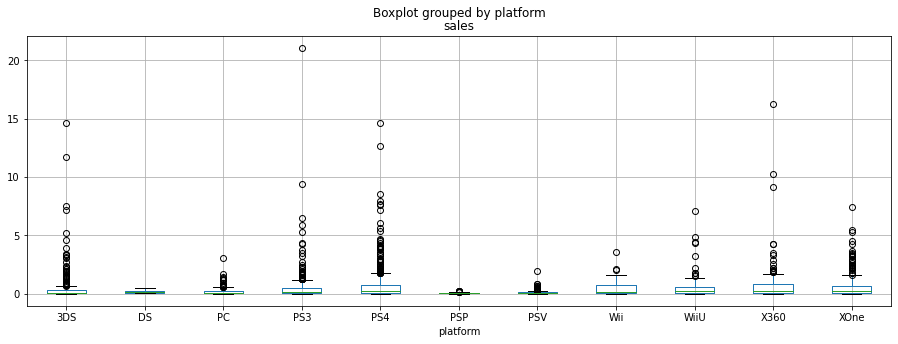

In [33]:
games_2017.query('platform in @platform').boxplot(column = 'sales', by = 'platform', figsize=(15,5));

Посмотрим ближе:

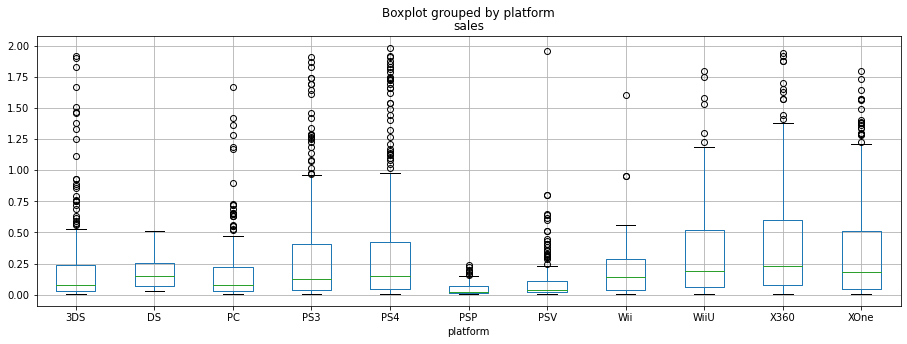

In [34]:
games_2017.query('sales <= 2').query('platform in @platform').boxplot(column = 'sales', by = 'platform', figsize=(15,5));

Медиана по  платформам изменяется от 0,15 до 0,25 млн долларов прибыли за игру. Верхняя граница предела, за которыми уже определяются аномалии, у платформы - PS3 - на уровне 1,35 млн долларов. У остальных - от 0,6 до 1,25 миллионов долларов. Среди всех выделяется PSP - у него эти показатели сильное ниже. Медиана < 0,1 миллиона долларов, верхняя граница - 0,27 млн.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Рассмотрим платформу PS3, самая "топовая" платформа по прибыли, которая еще с 2006 года.

Построим диаграмму рассеивания по оценкам пользователей и критиков.

* После изменения периода, самой прибыльной платформой показывает себя X360? Предлагаю ее и рассмотреть на диаграмме рассеивания по оценке пользователей и критиков

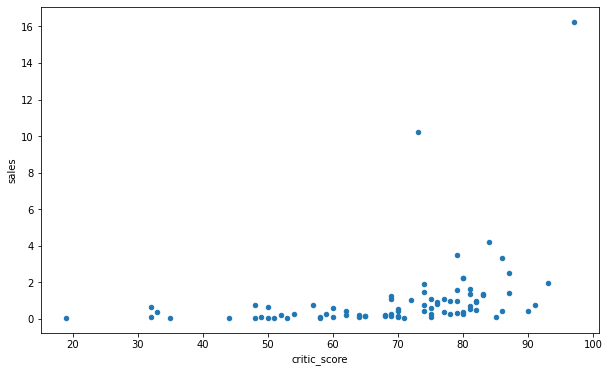

In [35]:
#рейтинг критиков 
games_ps3 = games_2017[(games_2017['platform'] == 'X360') & (games_2017['critic_score'] > 0)].copy()
games_ps3.plot(kind='scatter', x='critic_score', y='sales', figsize=(10,6));

С увеличением среднего рейтинга критиков увеличивается и средний уровень выручки с продажи игр. Не очень ярко, но все таки зависимость прослеживается.

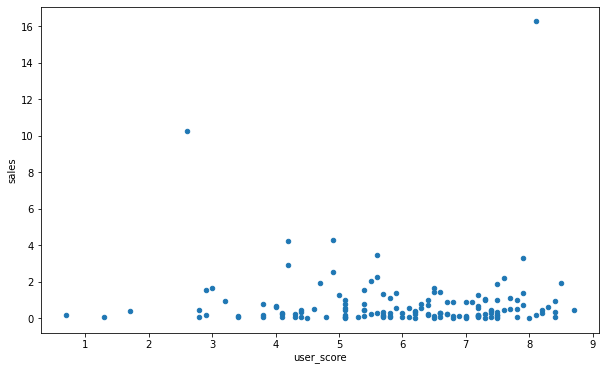

In [36]:
#по оценке пользователей 
games_ps3 = games_2017[(games_2017['platform'] == 'X360') & (games_2017['user_score'] > 0)].copy()
games_ps3.plot(kind='scatter', x='user_score', y='sales', figsize=(10,6));

При оценке пользователей, только правда так называемых выбросов больше.



Посчитаем корреляцию между отзывами и продажами.

In [37]:
games_ps3.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales
year_of_release,1.000000,-0.216024,-0.199516,-0.273765,-0.214572,-0.245439,-0.248736,-0.218402
na_sales,-0.216024,1.000000,0.846038,0.649905,0.982586,0.342724,-0.012298,0.981429
eu_sales,-0.199516,0.846038,1.000000,0.616022,0.925283,0.336418,-0.009435,0.932542
jp_sales,-0.273765,0.649905,0.616022,1.000000,0.656505,0.290613,0.112592,0.664104
other_sales,-0.214572,0.982586,0.925283,0.656505,1.000000,0.349204,-0.018868,0.998419
critic_score,-0.245439,0.342724,0.336418,0.290613,0.349204,1.000000,0.520946,0.350345
user_score,-0.248736,-0.012298,-0.009435,0.112592,-0.018868,0.520946,1.000000,-0.011742
sales,-0.218402,0.981429,0.932542,0.664104,0.998419,0.350345,-0.011742,1.000000


Влияние оценки критиков (0.35), более влияют на продажи. А зависимости между оценкой пользователей и продажами отсутствует, так как корреляция составила -0.011742.

Посмотрим данные по корреляции по топовым платформам:

In [38]:
games_top_1 = games[(games['platform'] == 'PS2') & (games['user_score'] > 0)].copy()
games_top_2 = games[(games['platform'] == 'X360') & (games['user_score'] > 0)].copy()
games_top_3 = games[(games['platform'] == 'Wii') & (games['user_score'] > 0)].copy()
games_top_4 = games[(games['platform'] == 'DS') & (games['user_score'] > 0)].copy()
games_top_5 = games[(games['platform'] == 'PS') & (games['user_score'] > 0)].copy()

In [39]:
#Выделим нужные нам данные:
games_top_1 = games_top_1[['sales' ,'critic_score', 'user_score']]
games_top_2 = games_top_2[['sales' ,'critic_score', 'user_score']]
games_top_3 = games_top_3[['sales' ,'critic_score', 'user_score']]
games_top_4 = games_top_4[['sales' ,'critic_score', 'user_score']]
games_top_5 = games_top_5[['sales' ,'critic_score', 'user_score']]

In [40]:
display('PS2', games_top_1.corr()[['sales']].sort_values(by='sales'));
display('X360', games_top_2.corr()[['sales']].sort_values(by='sales'));
display('Wii', games_top_3.corr()[['sales']].sort_values(by='sales'));
display('DS', games_top_4.corr()[['sales']].sort_values(by='sales'));
display('PS', games_top_5.corr()[['sales']].sort_values(by='sales'));

'PS2'

,sales
user_score,0.172866
critic_score,0.389220
sales,1.000000


'X360'

,sales
user_score,0.114459
critic_score,0.389513
sales,1.000000


'Wii'

,sales
user_score,0.112414
critic_score,0.169668
sales,1.000000


'DS'

,sales
user_score,0.132938
critic_score,0.230941
sales,1.000000


'PS'

,sales
user_score,0.297978
critic_score,0.428601
sales,1.000000


Данные по корреляции между выручкой и оценкой по платформам PS2, X360, PS3, PS, DS совпадает с общими данными по датафрейму. Выделяется Wii по которым зависимость не такая большая. Но так же зависимости между оценкой пользователей и продажами нет, так как корреляция составила менее 0,25. 



Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [41]:
games_2017.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [42]:
#Создадим таблицу
pivot_genre = games_2017.groupby('genre').agg({'name': 'count', 'sales': 'sum'}).sort_values(by='name', ascending=False)
pivot_genre

,name,sales
genre,,
Action,766,321.87
Role-Playing,292,145.89
Adventure,245,23.64
Sports,214,150.65
Shooter,187,232.98
Misc,155,62.82
Racing,85,39.89
Fighting,80,35.31
Platform,74,42.63


In [43]:
#Создадим таблицу по медиане
pivot_genre_med = games_2017.groupby('genre').agg({'name': 'count', 'sales': 'median'}).sort_values(by='name', ascending=False)


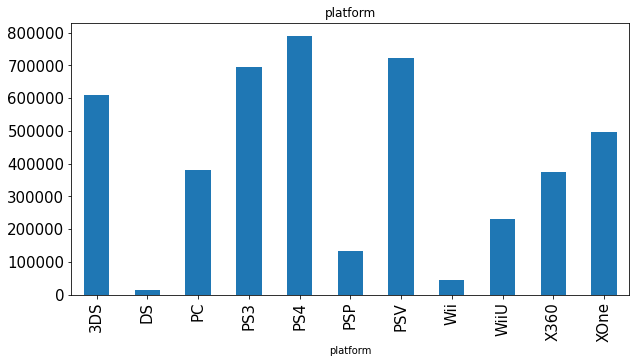

In [44]:
games_2017_platform = games_2017.groupby('platform').sum()['year_of_release']
games_2017_platform.plot(x='platform', y='sales', kind='bar',figsize=(10,5), title='platform', legend=None, fontsize=15 );

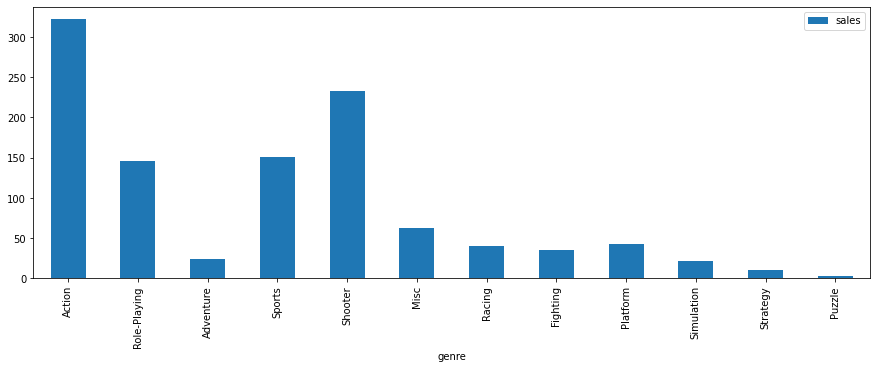

In [45]:
#Построим диаграмму по распределению суммы продаж

pivot_genre['sales'].plot(kind='bar', legend = True, figsize=(15,5) );    

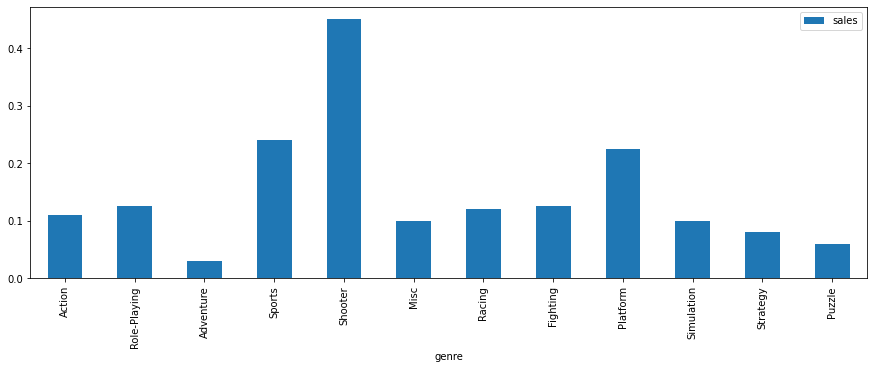

In [46]:
#Построим диаграмму по распределению суммы медианы продаж

pivot_genre_med['sales'].plot(kind='bar', legend = True, figsize=(15,5) ); 

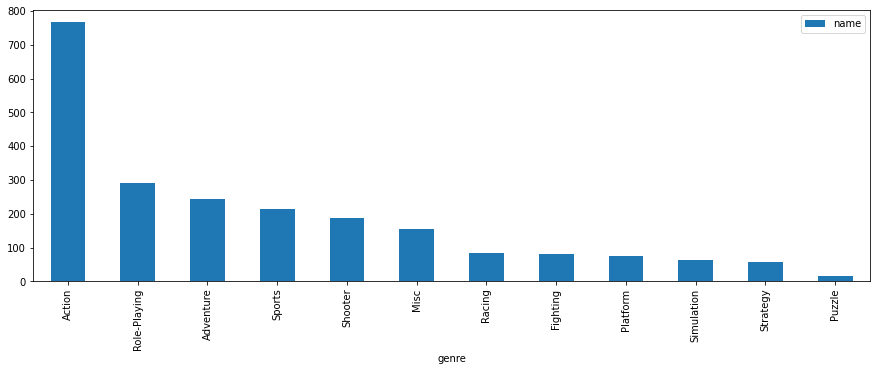

In [47]:
#Построим диаграмму по распределению количества продаж
pivot_genre['name'].plot(kind='bar', legend = True, figsize=(15,5));

Больше всего игр жанра Action. Потом идет жанр Sports. А выручка от продаж у них на немного отличается. Это значит, что спортивные игры, в среднем, стоят дороже, чем Action. По Misc можно сказать, что по количеству продаж они занимают 3 место, а по сумме прибыли находятся только на 6 месте, что скорее всего говорит о том, что стоимость игр такого жанра на порядок дешевле. Точно такую же законномерность можно наблюдать по жанрам Adventure и немного Strategy. А вот обратную закономерность, где количество продаж меньше, а сумма продаж больше наблюдается по жанрам Shooter, Platform, Racing и немного Fighting.

Распределение топ-3 по сумме продаж: Action, Sports, Shooter.
Распределение топ-3 по количеству продаж: Action, Sports, Misc.

Если смотреть распределение суммы по медиане, то больше всего прибыль приносит Shooter, на 2 месте Platform и Sports. Скорее всего говорит о том, что стоимость игр такого жанра на порядок выше

Больше всего прибыли по медиане игр жанра Action. Потом идет жанр Sports., Shooter, Role-Playing, Misc. Это 5 первых жанров по сумме медианы продаж. Посмотрим на количество продаж, тут так же первое место Action, но на 2 Role-Playing далее Adventure, Sports и Shooter. Role-Playing и Adventure по количеству продаж в лидерах, а по прибыли только на 4 и 5 месте, что скорее всего говорит о том, что стоимость игр такого жанра на порядок дешевле. А вот обратную закономерность, где количество продаж меньше, а сумма продаж больше наблюдается по жанрам Shooter, Sports.

Распределение топ-3 по медиане сумме продаж: Action, Sports, Shooter.

Распределение топ-3 по количеству продаж: Action, Role-Playing, Misc.

### Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

самые популярные платформы (топ-5), опишем различия в долях продаж;
самые популярные жанры (топ-5), поясним разницу;
определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Самые популярные платформы (топ-5) по долям продаж

In [48]:
pivot_na = games_2017.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)[:5]
pivot_eu = games_2017.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)[:5]
pivot_jp = games_2017.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)[:5]
 

<AxesSubplot:xlabel='platform'>

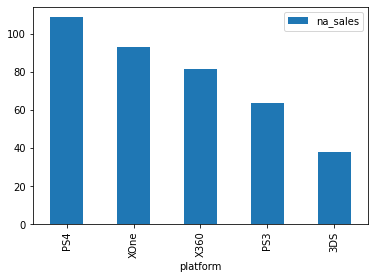

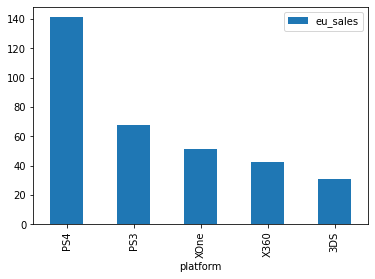

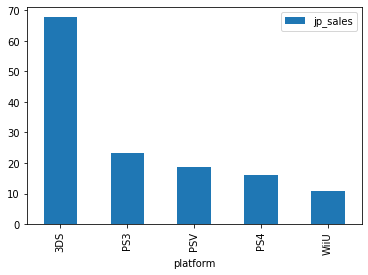

In [49]:
pivot_na.plot(kind='bar', legend = True)
pivot_eu.plot(kind='bar', legend = True)
pivot_jp.plot(kind='bar', legend = True)

В Северной Америке популярны платформы PS4 и XOne. Потом X360. Топ-4 и топ-5 - PS3 и 3DS соответственно.

В Европе популярны PS4 и PS3. Потом XOne. Топ-4 и топ-5 - X360 и 3DS

В Японии, всё наоборот. Популярна платформа - 3DS. Потом практически на равне PS3 и PSV. Топ-4 и топ-5 PS4 и WiiU.



Определение самых популярных жанров в заданных регионах

In [50]:
pivot_na_genre = games_2017.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)[:5]
pivot_eu_genre = games_2017.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)[:5]
pivot_jp_genre = games_2017.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)[:5]

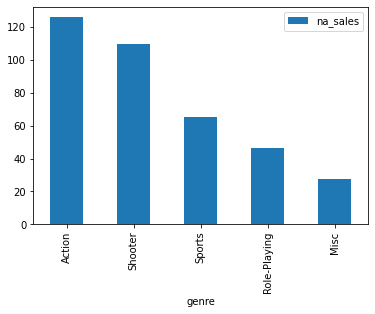

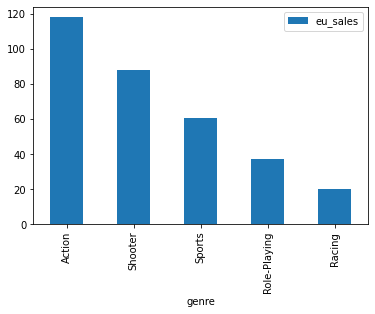

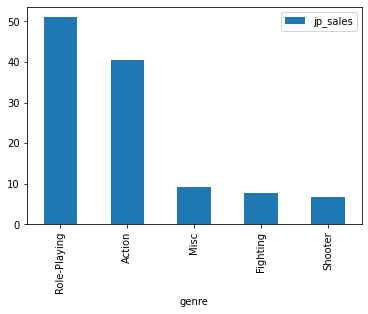

In [51]:
pivot_na_genre.plot(kind='bar', legend = True);
pivot_eu_genre.plot(kind='bar', legend = True);
pivot_jp_genre.plot(kind='bar', legend = True);

In [52]:
games_2017['rating'].unique()

array(['M', nan, 'E', 'T', 'E10+'], dtype=object)

In [53]:
games_2017['rating'] = games_2017['rating'].fillna(value = 'unknown')

In [54]:
pivot_na_ESRB = games_2017.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)[:5]
pivot_eu_ESRB = games_2017.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)[:5]
pivot_jp_ESRB = games_2017.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)[:5]

<AxesSubplot:xlabel='rating'>

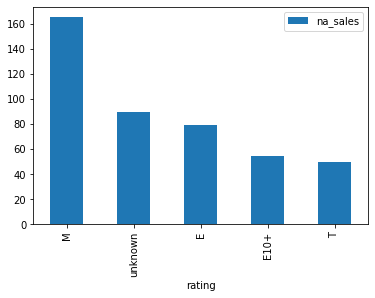

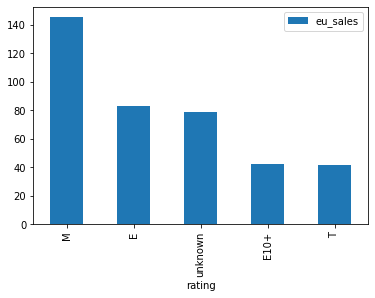

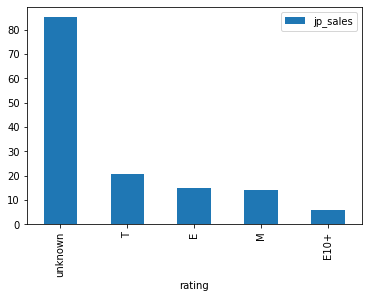

In [55]:
pivot_na_ESRB.plot(kind='bar', legend = True)
pivot_eu_ESRB.plot(kind='bar', legend = True)
pivot_jp_ESRB.plot(kind='bar', legend = True)

По все регионам можно выявить,что по рейтингу ESRB, категория "М" приносит больше прибыли. Далее в Северной Америке и в Европе категория "Е". Потом примерно на одинаковом уровне идет категория "Е10+" и "Т" . В Японии на первом месте идет категория "Т" и далее категория "Е" и "М" с большим перепадом от 3 места идет категория "Е10+" так же как и в Европе и Америке. Без рейтинга игры больше всего продаются в Японии, на первом месте, В США игры без рейтинга на 2 месте, А в Европе занимают 3 место

### Проверьте гипотезы¶

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Cредние пользовательские рейтинги жанров Action и Sports разные.

Определим пороговое значение alpha = 0.05

Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

* Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

* Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [56]:
xbox_one_rating = games_2017[(games_2017['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc_rating = games_2017[(games_2017['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']

In [57]:
alpha = 0.05
results = st.ttest_ind(xbox_one_rating, pc_rating)
print('p-значение:', results.pvalue)
print('\nПороговое значение alpha = 0.05')
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647

Пороговое значение alpha = 0.05
Не получилось отвергнуть нулевую гипотезу


У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.



У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

* Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.

* Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [58]:
action_rating = games_2017[(games_2017['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
pc_rating = games_2017[(games_2017['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']

In [59]:
alpha = 0.05
results = st.ttest_ind(action_rating, pc_rating)
print('p-значение:', results.pvalue)
print('\nПороговое значение alpha = 0.05')
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27

Пороговое значение alpha = 0.05
Отвергаем нулевую гипотезу


Унас нет  основания утверждать, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

### Общий вывод

По проведенному анализу: самое сильное влияние на итоговую выручку оказывает, в большинстве случаев, оценка критиков. Зависимости между оценкой пользователей и продажами нет, так как корреляция составила менее 0,25. 

В целом в игровой индустрии: рынок компьютерных игр постепенно падает, это мы видим исходя из данных графика " отображающий динамику продаж по уже актуальным годам ", количество продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сказать, что весь рынок игр падает.

Сейчас можно выделить 3 максимально доходные платформы, которые работают, это: PS4; Xone; 3DS. Но так же платформы PS3, WiiU, Wii, PC находятся на не плохом уровне продаж